<a href="https://colab.research.google.com/github/sceary-expert/open-cv-image-classifier/blob/main/CatOrDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!mkdir -p ~/.kaggle

In [10]:
!cp kaggle.json ~/.kaggle/


In [11]:
!kaggle datasets download -d salader/dogs-vs-cats


 98% 1.04G/1.06G [00:07<00:00, 157MB/s]
100% 1.06G/1.06G [00:07<00:00, 150MB/s]


In [12]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf


In [15]:
from tensorflow import keras

In [16]:
from keras import Sequential

In [17]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [18]:
train_data_set = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.


In [19]:
test_data_set = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)

Found 5000 files belonging to 2 classes.


In [21]:
from keras.layers import BatchNormalization

In [22]:
from keras.layers import Dropout

In [23]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [28]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_data_set.map(process)
validation_ds = test_data_set.map(process)

In [29]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 82s 102ms/step - loss: 1.1690 - accuracy: 0.6001 - val_loss: 0.6185 - val_accuracy: 0.6466
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5725 - accuracy: 0.7096 - val_loss: 0.5626 - val_accuracy: 0.7122
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5009 - accuracy: 0.7620 - val_loss: 0.7037 - val_accuracy: 0.6020
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4311 - accuracy: 0.8027 - val_loss: 0.4536 - val_accuracy: 0.8010
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3671 - accuracy: 0.8353 - val_loss: 0.4544 - val_accuracy: 0.7872
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3000 - accuracy: 0.8707 - val_loss: 0.6229 - val_accuracy: 0.7404
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2249 - accuracy: 0.9062 - val_loss: 0.7528 - val_ac

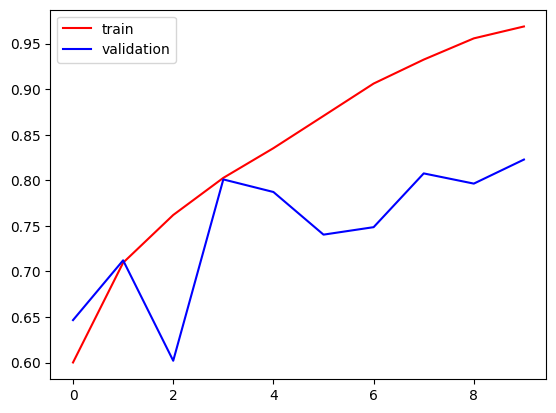

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

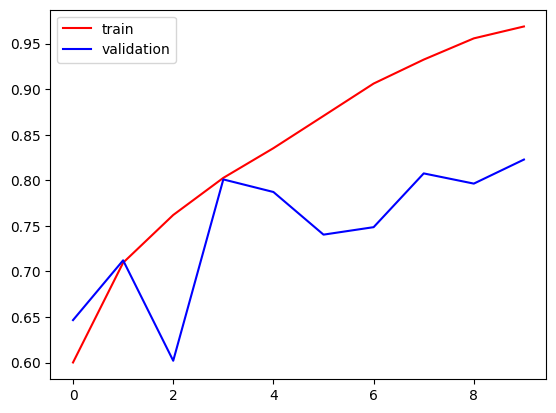

In [31]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

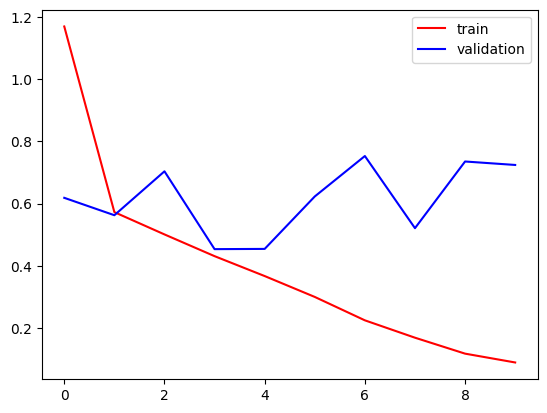

In [32]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

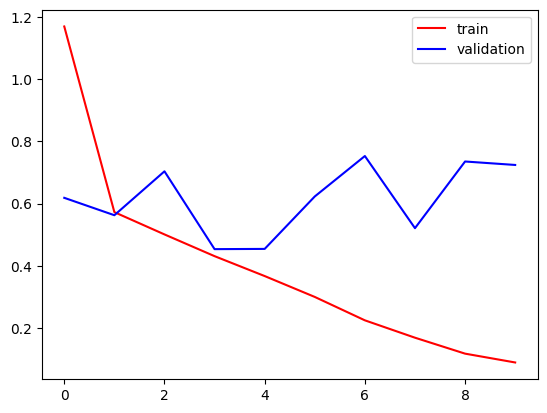

In [33]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [34]:
import cv2


In [36]:
test_img = cv2.imread('/content/cat-photo.jpeg')

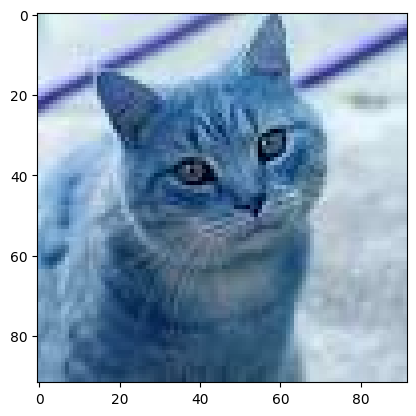

In [37]:
plt.imshow(test_img)

In [38]:
test_img.shape

(92, 92, 3)

In [39]:
test_img = cv2.resize(test_img,(256,256))

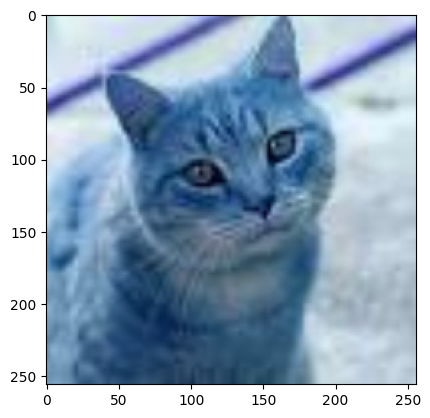

In [40]:
plt.imshow(test_img)

In [41]:
test_input = test_img.reshape((1,256,256,3))

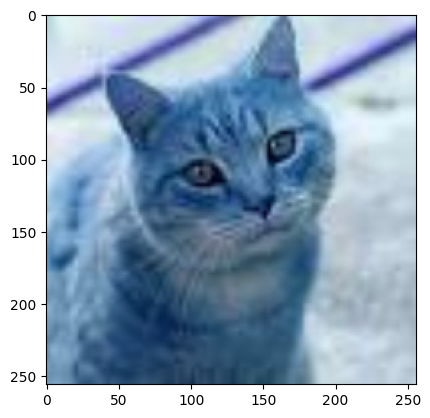

In [42]:
plt.imshow(test_img)

In [43]:
model.predict(test_input)

1/1 [==============================] - 0s 299ms/step


array([[0.]], dtype=float32)